# Poisoning attacks

Goal is to modify the classifier to misbehave on specific inputs
that are known by the adversary without compromising its performance on regular inputs.

## Overview

The concept behind the poisoning attack is that the adversary **adds
adversarial samples to the legitimate user template in order to
change the decision boundary of the classifier**. Figure 2 shows a
two-dimensional representation of how the attack works. There
are three categories of samples:
1. user (victim) samples: legitimate user samples
2. attacker samples: samples coming from the biometric trait of
the adversary
3. poisoning samples: samples algorithmically crafted by the adversary



<img src="https://user-images.githubusercontent.com/64481847/95554520-eebb7200-0a2d-11eb-9ad1-2e88fb079911.png" width="500px">

Knowing his own template and a user sample as the starting
point, the adversary crafts the poisoning samples accordingly. As
the self-update threshold is in place, the adversary must make sure
that the crafted samples lie within the current accepted region
(shaded blue area), otherwise they would be rejected as anomalous.
By injecting one poisoning sample at a time, the adversary shifts
the decision boundary towards his own sample distribution. With
sufficient poisoning samples, the adversary will move the decision
boundary enough so that his own samples will fall inside it, and
can therefore impersonate the user with his own trait.



## Data Overview

In [2]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/My Drive/Github/Face_detector

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Github/Face_detector


In [40]:
import os
import numpy as np
import pandas as pd
from tqdm import tqdm

import seaborn as sns
from sklearn.decomposition import PCA

import tensorflow as tf
from tensorflow.keras.models import load_model

import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import cv2
from PIL import Image

In [3]:
def load_img(path, resize=None):
    img= Image.open(path)
    img= img.convert('RGB')
    if resize is not None:
        img= img.resize((resize, resize))
    return np.asarray(img)

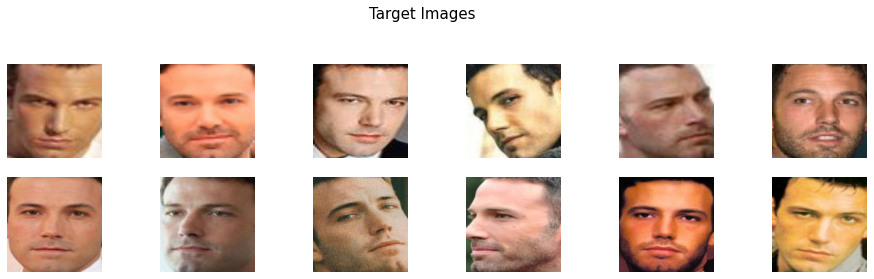

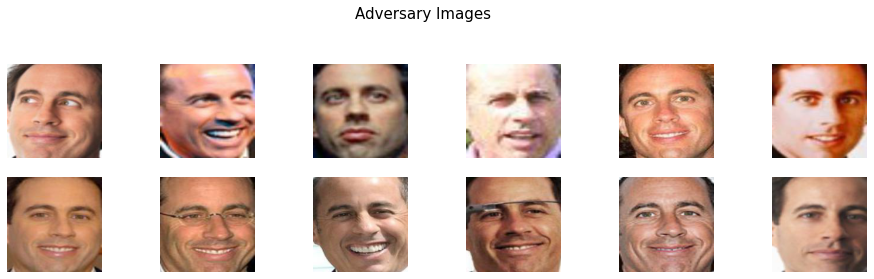

In [16]:
target_dir= 'face_detector/Croped_data/target_images'
adver_dir= 'face_detector/Croped_data/adversary_images'

plt.figure(figsize=(16,8))
c=1
for image_path in os.listdir(target_dir)[:12]:
  path= os.path.join(target_dir, image_path)
  img= load_img(path)
  plt.subplot(4,6,c)
  plt.imshow(img)
  plt.axis('off')
  c+=1
plt.suptitle('Target Images', size=15)
plt.show()

plt.figure(figsize=(16,8))
c=1
for image_path in os.listdir(adver_dir)[:12]:
  path= os.path.join(adver_dir, image_path)
  img= load_img(path)
  plt.subplot(4,6,c)
  plt.imshow(img)
  plt.axis('off')
  c+=1
plt.suptitle('Adversary Images', size=15)
plt.show()

In [26]:
# dir--> face_detector/Croped_data
def load_data(dir):
  X, Y=[], []
  for i, people_dir in enumerate(os.listdir(dir)):
    print('Processing for:', people_dir)
    path= os.path.join(dir, people_dir)
    for people in (os.listdir(path)):
      image= load_img(os.path.join(path, people))
      image = cv2.resize(image, (160, 160))

      X.append(image/255.0)
      Y.append(people_dir)
  return np.array(X), np.array(Y)

In [29]:
X, Y= load_data('face_detector/Croped_data')
print(X.shape, Y.shape)

Processing for: adversary_images
Processing for: target_images
(38, 160, 160, 3) (38,)


In [33]:
def Get_features(X):
  return model.predict(X)

model = load_model('model/facenet_keras.h5', compile= False)

features= Get_features(X)
print('features shape:',features.shape)

df=pd.DataFrame(features)
# Create a PCA instance:
pca = PCA(n_components=2) 
# Fit pca to 'X'
pca_features = pca.fit_transform(df)
print('pca_features shape', pca_features.shape)

features shape: (38, 128)
pca_features shape (38, 2)


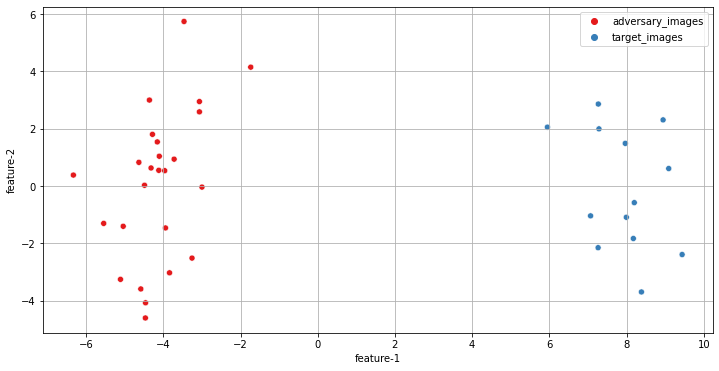

In [65]:
fig, ax = plt.subplots(figsize=(12, 6))
plt.grid(True)
plt.xlabel('feature-1'); plt.ylabel('feature-2')
sns.scatterplot(x=pca_features[:, 0] , y= pca_features[:, 1], hue = Y, palette='Set1', ax= ax)
plt.show()